<a href="https://colab.research.google.com/github/samark02/Stockprice_prediction/blob/main/Stockpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df= pd.read_csv("/content/NFLX.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
df.shape

(1009, 7)

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


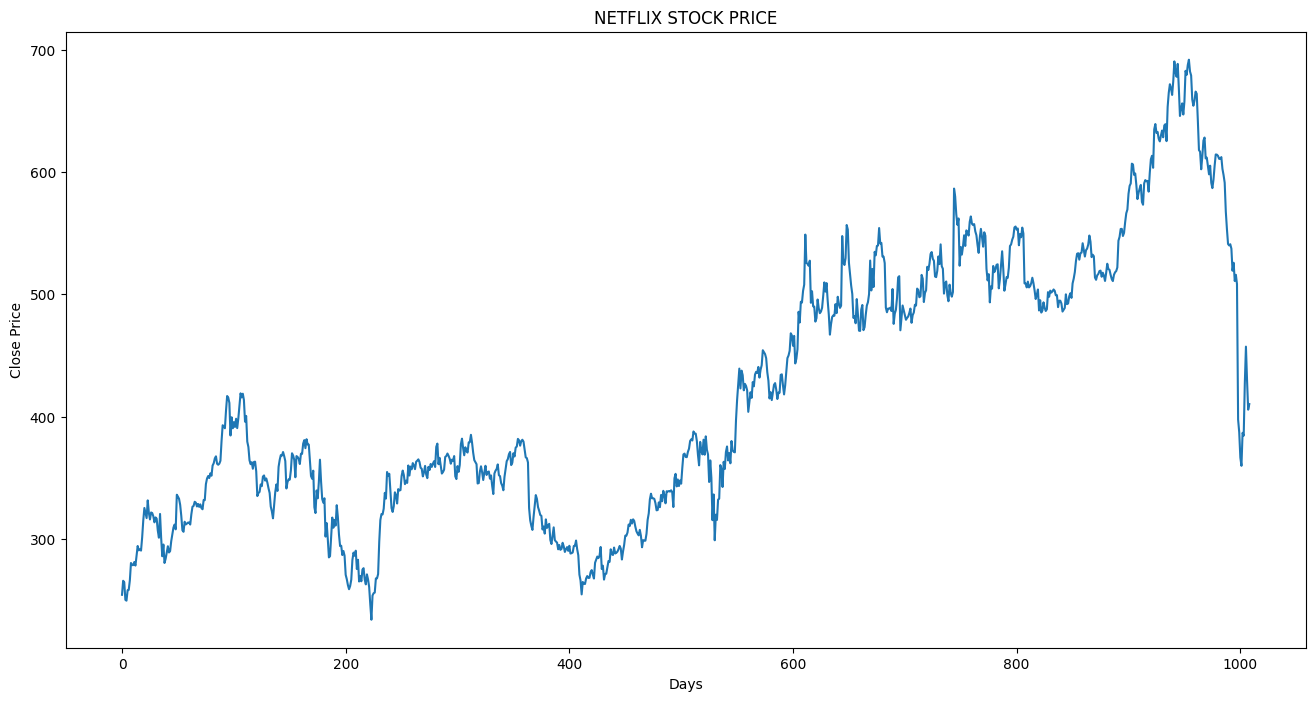

In [ ]:
plt.figure(figsize=(16,8))
plt.title("NETFLIX STOCK PRICE")
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.show()

In [ ]:
df= df[['Close']]
df.head()

,Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006
4,249.470001


In [ ]:
#Creating a variable to predict x days into the future
future_days=25

In [ ]:
df['Prediction']=df[['Close']].shift(-future_days)
df.tail()

,Close,Prediction
1004,427.140015,NaN
1005,457.130005,NaN
1006,429.480011,NaN
1007,405.600006,NaN
1008,410.170013,NaN


In [ ]:
X=np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[254.259995]
 [265.720001]
 [264.559998]
 [250.100006]
 [249.470001]
 [257.950012]
 [258.269989]
 [266.      ]
 [280.269989]
 [278.519989]
 [278.549988]
 [281.040009]
 [278.140015]
 [285.929993]
 [294.160004]
 [290.609985]
 [291.380005]
 [290.390015]
 [301.049988]
 [315.      ]
 [325.220001]
 [321.160004]
 [317.      ]
 [331.440002]
 [321.299988]
 [315.880005]
 [321.549988]
 [321.089996]
 [318.450012]
 [313.480011]
 [317.5     ]
 [316.480011]
 [306.700012]
 [300.940002]
 [320.350006]
 [300.690002]
 [285.769989]
 [295.350006]
 [280.290009]
 [283.670013]
 [288.940002]
 [293.970001]
 [288.850006]
 [289.929993]
 [298.070007]
 [303.670013]
 [309.25    ]
 [311.649994]
 [307.779999]
 [336.059998]
 [334.519989]
 [332.700012]
 [327.769989]
 [318.690002]
 [307.019989]
 [305.76001 ]
 [313.980011]
 [311.76001 ]
 [312.459991]
 [313.299988]
 [313.359985]
 [311.690002]
 [320.089996]
 [326.26001 ]
 [326.890015]
 [330.299988]
 [329.600006]
 [326.459991]
 [328.529999]
 [326.130005]
 [328.190002]
 [325.

<ipython-input-10-0522a47ccbe7>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=np.array(df.drop(['Prediction'],1))[:-future_days]


In [ ]:
Y = np.array(df['Prediction'])[:-future_days]
print(Y)

[315.880005 321.549988 321.089996 318.450012 313.480011 317.5
 316.480011 306.700012 300.940002 320.350006 300.690002 285.769989
 295.350006 280.290009 283.670013 288.940002 293.970001 288.850006
 289.929993 298.070007 303.670013 309.25     311.649994 307.779999
 336.059998 334.519989 332.700012 327.769989 318.690002 307.019989
 305.76001  313.980011 311.76001  312.459991 313.299988 313.359985
 311.690002 320.089996 326.26001  326.890015 330.299988 329.600006
 326.459991 328.529999 326.130005 328.190002 325.220001 324.179993
 331.820007 331.619995 344.720001 349.290009 351.290009 349.730011
 353.540009 351.600006 359.929993 361.809998 365.799988 367.450012
 361.399994 360.570007 361.450012 363.829987 379.929993 392.869995
 391.980011 390.399994 404.980011 416.76001  415.440002 411.089996
 384.480011 399.390015 390.390015 395.420013 391.429993 398.179993
 390.519989 398.390015 408.25     418.970001 415.630005 418.649994
 413.5      395.799988 400.480011 379.480011 375.130005 364.230011


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [ ]:
#Decision Tree Regressor Model
tree= DecisionTreeRegressor().fit(X_train,Y_train)

#Linear Regression Model
lr= LinearRegression().fit(X_train,Y_train)

In [ ]:
x_future=df.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

<ipython-input-14-6675df72f1ab>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future=df.drop(['Prediction'],1)[:-future_days]


array([[658.289978],
       [665.640015],
       [663.840027],
       [641.900024],
       [617.77002 ],
       [616.469971],
       [602.130005],
       [612.690002],
       [625.580017],
       [628.080017],
       [611.      ],
       [611.659973],
       [604.559998],
       [597.98999 ],
       [605.039978],
       [591.059998],
       [586.72998 ],
       [593.73999 ],
       [604.919983],
       [614.23999 ],
       [614.090027],
       [613.119995],
       [610.710022],
       [610.539978],
       [612.090027]])

In [ ]:
tree_prediction =tree.predict(x_future)
print(tree_prediction)
print()
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[602.440002 597.369995 591.150024 646.909973 553.289978 541.059998
 539.849976 540.840027 537.219971 678.799988 525.690002 510.799988
 515.859985 508.25     397.5      387.149994 366.420013 674.049988
 386.700012 384.359985 384.359985 457.130005 429.480011 405.600006
 410.170013]

[638.13215078 644.71055644 643.09953717 623.4628687  601.86611282
 600.70254729 587.86803864 597.31941201 608.85619034 611.09373202
 595.80683205 596.39751888 590.04292289 584.16265619 590.47251299
 577.96019781 574.08475951 580.35883533 590.36511546 598.70667711
 598.57245773 597.70426292 595.5472969  595.39510469 596.78242438]


<ipython-input-16-688b894a24b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


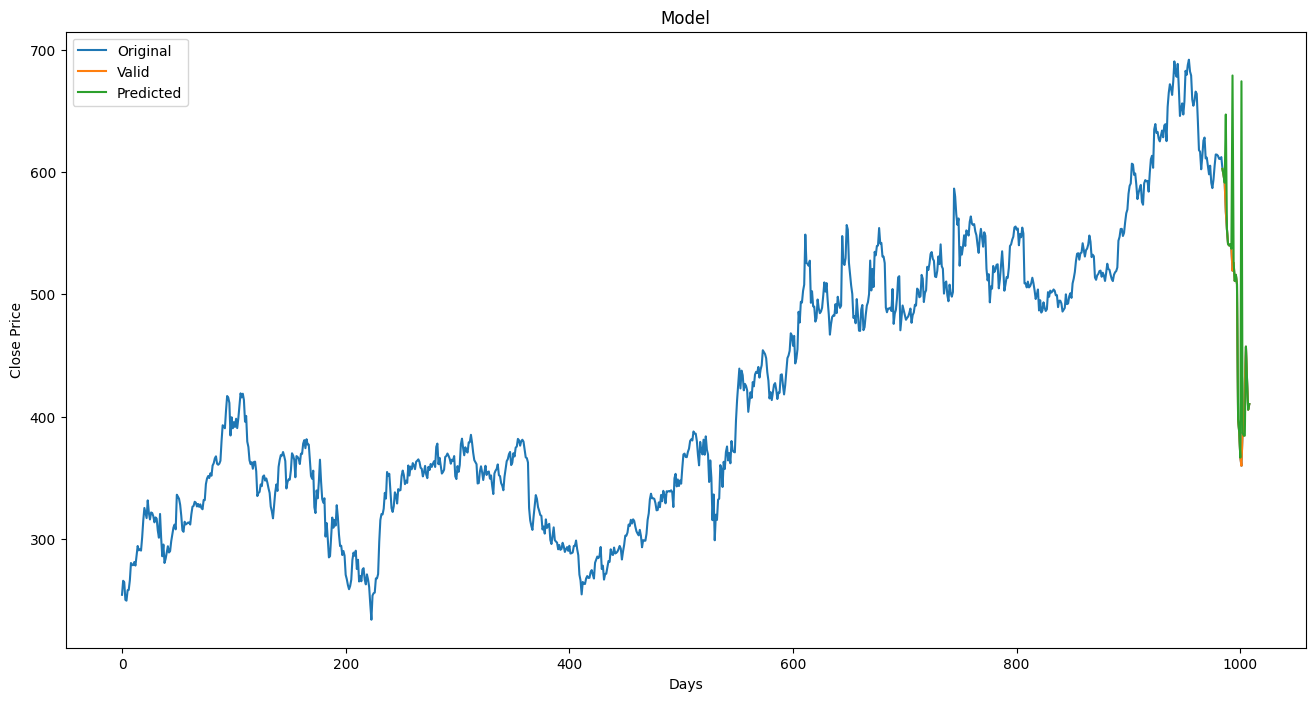

In [ ]:
predictions = tree_prediction
valid=df[X.shape[0]:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Original','Valid','Predicted'])
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
tree.score(X_test,Y_test)

0.7351078398356403

<ipython-input-18-da3ea01878dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


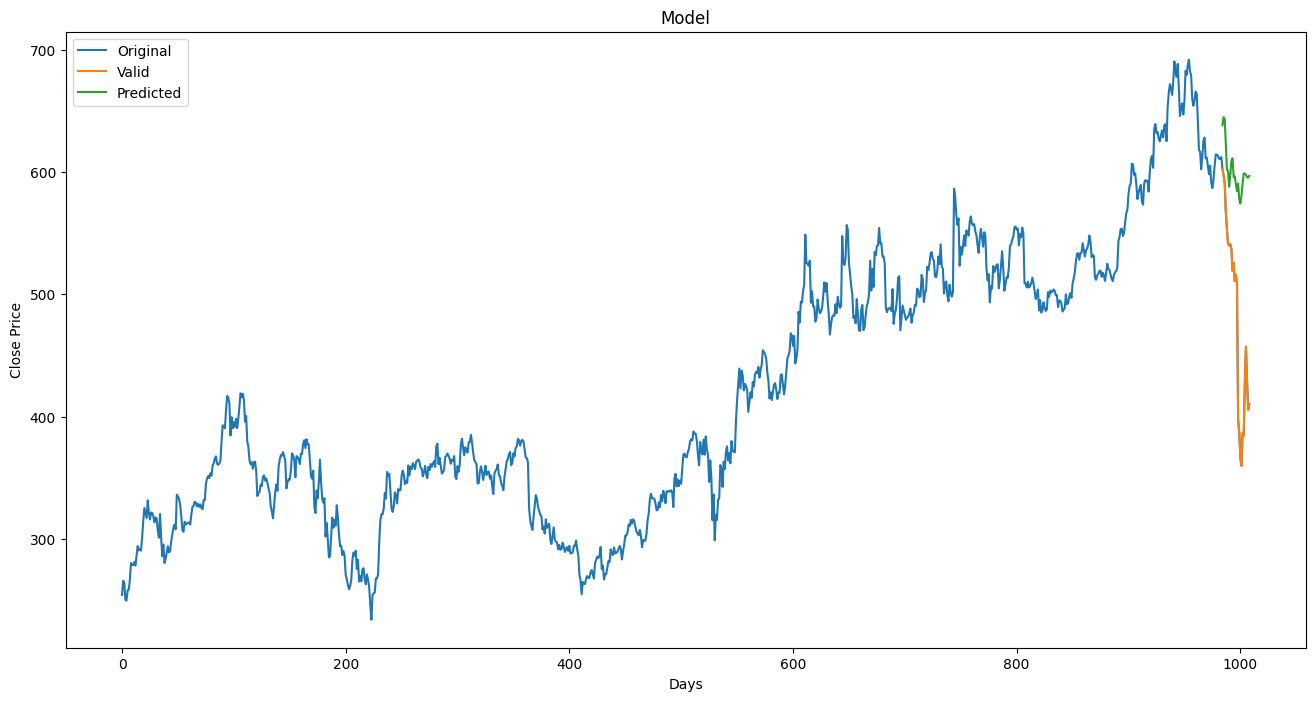

In [ ]:
predictions = lr_prediction
valid=df[X.shape[0]:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Original','Valid','Predicted'])
plt.show()

In [ ]:
lr.score(X_test,Y_test)

0.8196261495089102

In [ ]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
import xgboost as xgb

In [ ]:
#Random Tree Regressor Model
rtree= RandomForestRegressor().fit(X_train,Y_train)
#Extra Trees Regressor Model
extree= ExtraTreesRegressor().fit(X_train,Y_train)

In [ ]:
rtree_prediction =rtree.predict(x_future)
print(rtree_prediction)
print()
extree_prediction =extree.predict(x_future)
print(extree_prediction)

[601.13219506 617.23540523 608.82940663 651.8974823  541.72878332
 535.85839292 516.45768264 524.381414   580.25137772 676.51619815
 488.73110507 490.34199465 478.50099399 565.18639163 416.73780203
 482.69619334 459.94050321 641.82909111 412.63380659 474.3607845
 474.3607845  516.47259688 434.6423089  435.33020865 450.19100687]

[602.440002   597.369995   591.150024   636.63677657 553.289978
 541.059998   539.849976   540.840027   537.219971   678.86359148
 525.690002   510.799988   515.859985   508.25       397.5
 387.149994   366.420013   655.81198932 386.700012   384.359985
 410.4959836  457.130005   429.480011   405.600006   410.170013  ]


<ipython-input-23-cbde1bb57949>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


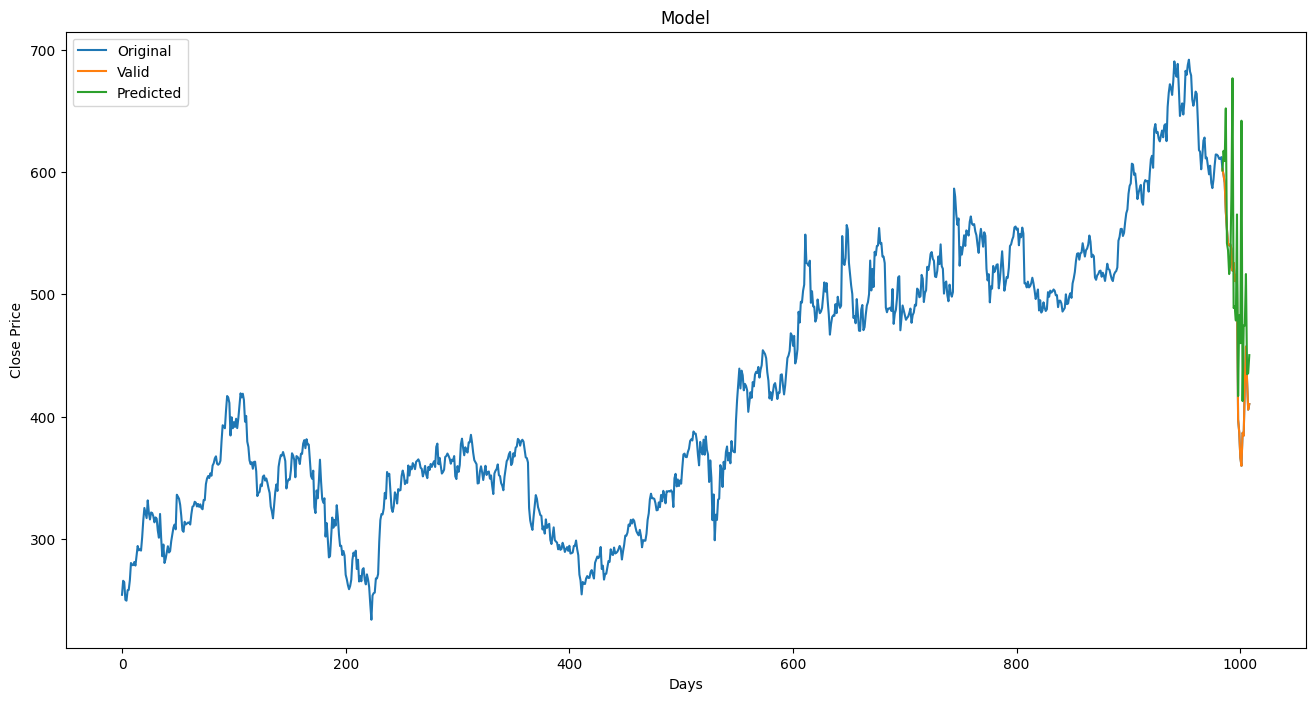

In [ ]:
predictions = rtree_prediction
valid=df[X.shape[0]:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Original','Valid','Predicted'])
plt.show()

In [ ]:
rtree.score(X_test,Y_test)

0.792669269831208

<ipython-input-25-a42db5ce17cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


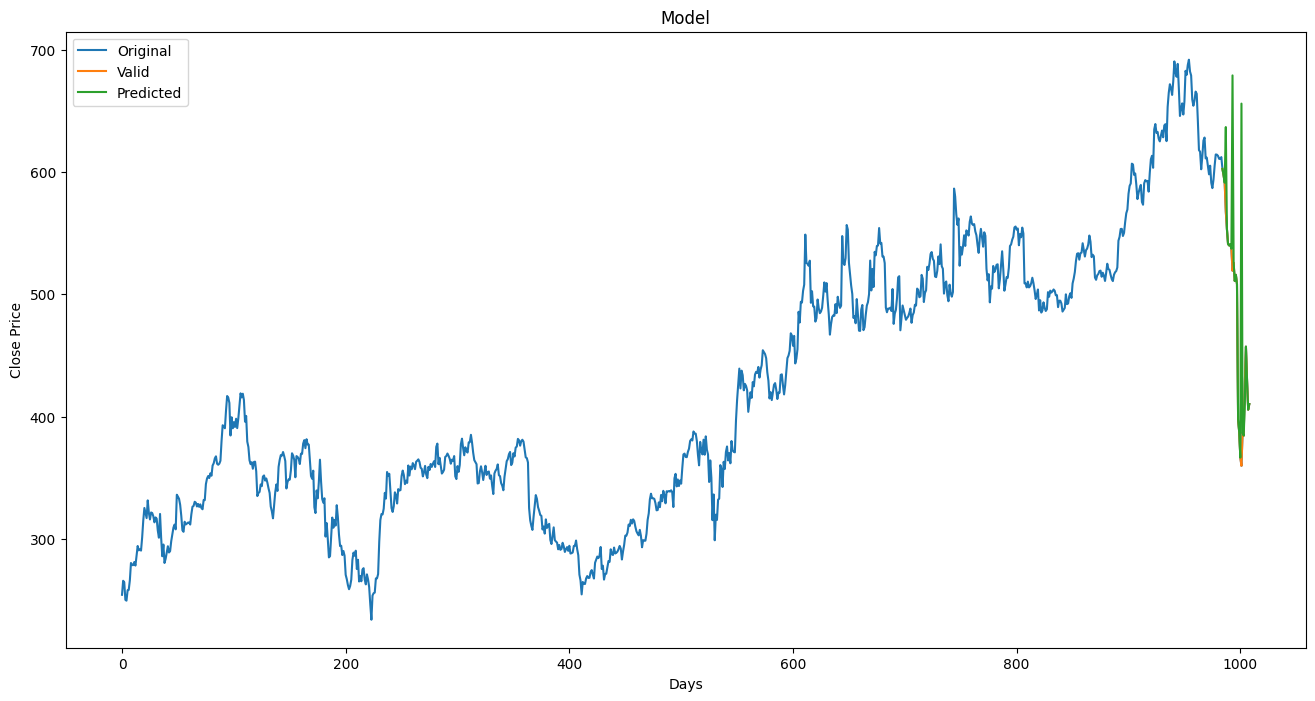

In [ ]:
predictions = extree_prediction
valid=df[X.shape[0]:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Original','Valid','Predicted'])
plt.show()

In [ ]:
extree.score(X_test,Y_test)

0.7724553235426501

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#XGB Model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

In [ ]:
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)

# Calculate the root mean squared error (RMSE) of the predictions
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print("RMSE: %.2f" % rmse)

RMSE: 41.12


In [ ]:
xgb_model.score(X_test,Y_test)

0.8483445792018416

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
#Voting Regressor Model
vr= VotingRegressor([('r1',tree),('r2',lr),('r3',extree),('r4',rtree),('r5',xgb_model)])

In [ ]:
vr.fit(X_train,Y_train)

VotingRegressor(estimators=[('r1', DecisionTreeRegressor()),
                            ('r2', LinearRegression()),
                            ('r3', ExtraTreesRegressor()),
                            ('r4', RandomForestRegressor()),
                            ('r5',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, featur...
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=3,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=42, ...))])

In [ ]:
vr.score(X_test,Y_test)

0.8218267730056842

In [ ]:
voting_y_pred=vr.predict(X_test)

In [ ]:
voting_y_pred

array([373.6829362 , 505.85552834, 317.88381464, 337.79491617,
       505.15866636, 624.69774203, 364.12558603, 397.40326841,
       374.47135608, 636.64002671, 525.12658762, 355.37344895,
       297.51635603, 309.18902994, 346.94945209, 532.0983672 ,
       518.88785598, 517.06288817, 333.05654937, 526.9869045 ,
       369.97516601, 491.02727332, 494.5007835 , 284.9521662 ,
       440.427457  , 369.84433606, 485.20671036, 317.13314707,
       356.87054828, 319.49746492, 475.75679214, 349.86691358,
       372.87504572, 379.30771326, 277.00976677, 561.18688648,
       362.07227031, 408.52945825, 552.77666699, 360.3771929 ,
       344.66955993, 500.75492319, 359.79921086, 399.99821089,
       394.39412508, 309.58959937, 284.50676533, 628.7813093 ,
       521.27078512, 350.2001385 , 537.08143436, 483.12249175,
       292.13091401, 283.44591451, 350.10455704, 289.78394045,
       321.59802437, 474.01642415, 372.77839595, 311.99202391,
       515.14049119, 368.46999198, 506.48576048, 486.48

In [ ]:
print("Decision Tree :",tree.score(X_test,Y_test))
print("Random Tree :",rtree.score(X_test,Y_test))
print("Extra Tree :",extree.score(X_test,Y_test))
print("Linear Regression :",lr.score(X_test,Y_test))
print("XGB Model :",xgb_model.score(X_test,Y_test))
print("Voting Regressor :",vr.score(X_test,Y_test))

Decision Tree : 0.7351078398356403
Random Tree : 0.792669269831208
Extra Tree : 0.7724553235426501
Linear Regression : 0.8196261495089102
XGB Model : 0.8483445792018416
Voting Regressor : 0.8218267730056842


<ipython-input-96-7bd2b68cd073>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


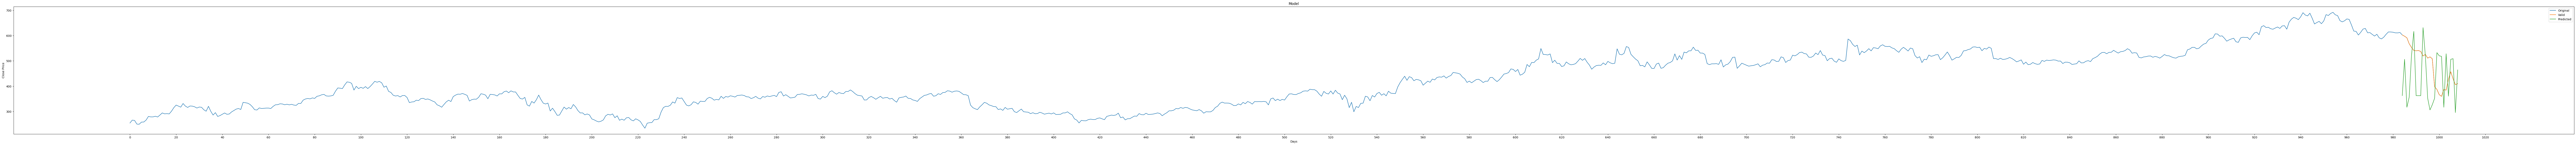

In [ ]:
predictions = y_pred.take(range(25))
valid=df[X.shape[0]:]
valid['predictions'] = predictions
plt.figure(figsize=(160,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Original','Valid','Predicted'])
plt.xticks(np.arange(0, 1040, 20))
plt.show()